In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\\ x = \Re(\sqrt{Z_{n}/ |Z_{n}|})
\\ y = \Im(\sqrt{Z_{n}/ |Z_{n}|})*i
\\ dv = |Z_{n} - Z_{0}|
\\ Z_{n+1} = Z_{n} - ( a*x^3 + 3*b*x^2*y + 3*c*x*y^2 + d*y^3 )^{Z_{n}*dv}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# numerical oddity: variation of binomial expansion produces humanoid

    Sequential iteration of difference equation:
    Zr = sqrt(Z/abs(Z));
    x = real(Zr);
    y = imag(Zr)*i;
    d = abs(Z-Z0)
    Z = Z - ( p(1)*x^3 + 3*p(2)*x^2*y + 3*p(3)*x*y^2 + p(4)*y^3 )^(Z*d);

    with parameter set:
    p = [1.92846051108342, 2.27919841968635, 3.37327534248407, 2.17984103218476]
    
    on the complex plane produces a torso and head like figure.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def T_Spake_Z(Z, p, Z0=None, ET=None):
    """ Z = T_Spake_Z(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number

    Returns:
        Z:    the result (complex)
    """
    d = np.abs(Z-Z0)
    Zxy = np.sqrt(Z/np.abs(Z))
    x = np.real(Zxy)
    y = np.imag(Zxy)*1j
    Z = Z - ( p[0]*x**3 + 3*p[1]*x**2*y + 3*p[2]*x*y**2 + p[3]*y**3 )**(Z*d)

    return Z

In [4]:
#                                        -- define parameters iterate the above equation  --
#                                        -- machine with 8 cores --
par_set = {'n_rows': 800, 'n_cols': 600}
par_set['center_point'] = 1/3 + 0.0j
par_set['theta'] = np.pi/2
par_set['zoom'] = 1/3

par_set['it_max'] = 65
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(T_Spake_Z, ([1.92846051108342, 2.27919841968635, 3.37327534248407, 2.17984103218476]))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

151.14361023902893 	 total time


In [5]:
#                  Escape Time Graphical norm - graphically easier data
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

converstion time =	 0.9931199550628662


coloring time =	 2.7218286991119385


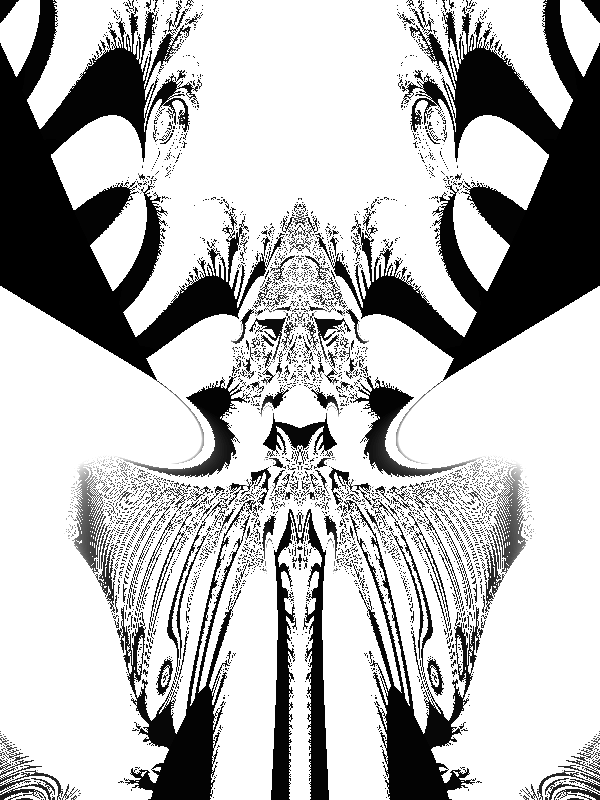

In [6]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ET)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 2.7412221431732178


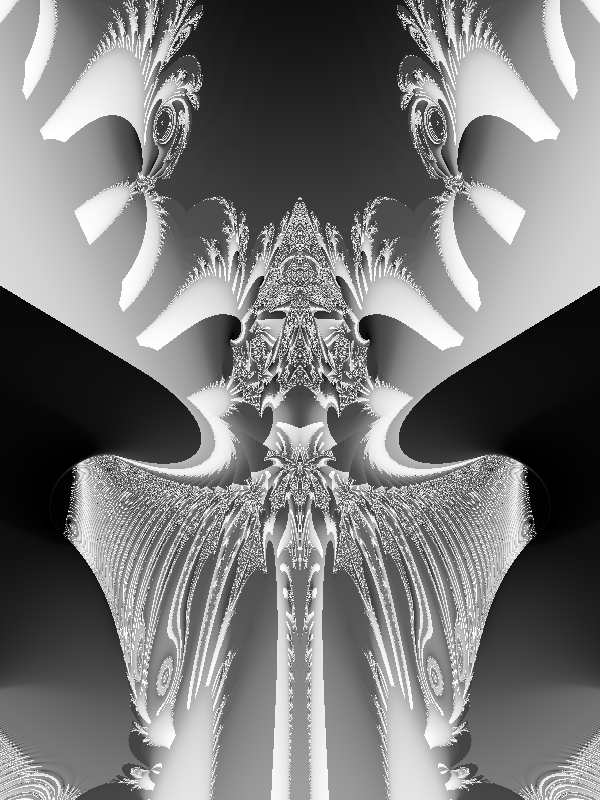

In [8]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 2.574289083480835


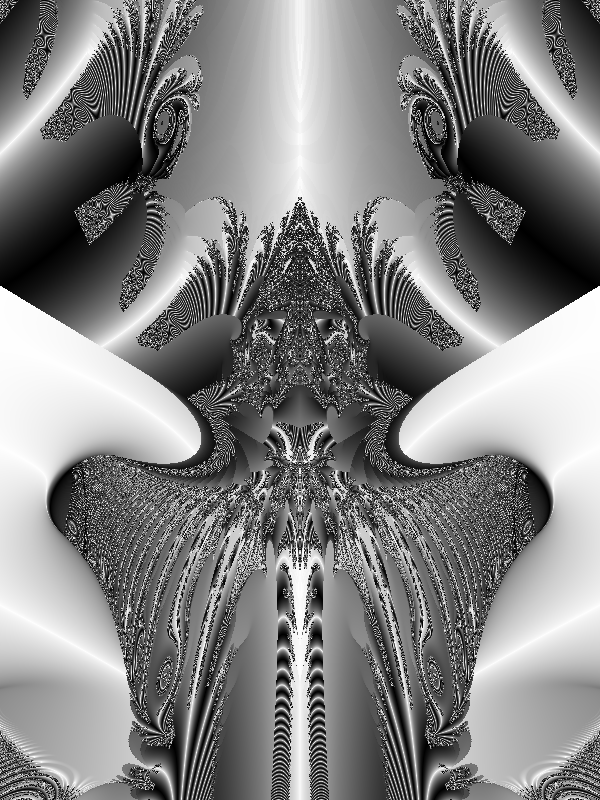

In [9]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 4.307889938354492


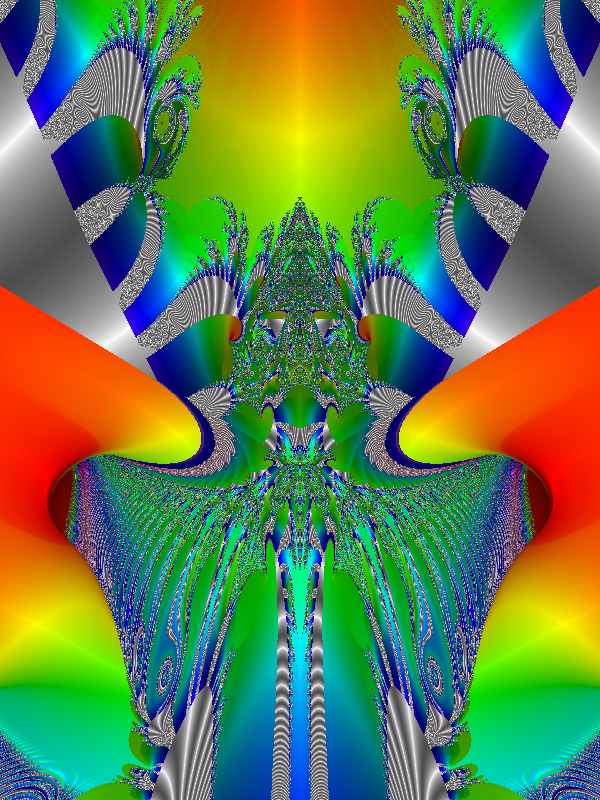

In [122]:
#                  Rotation > Hue, Distance > Saturation, Escape Time > Value (intensity-brightness) (muted)
H = ncp.graphic_norm(Zd)
S = ncp.graphic_norm(ET)
V = ncp.graphic_norm(Zr)

Hue_width = 1.0
H_min = 0.0
H_max = H_min + Hue_width

S_max = 1.0
S_min = 0.0

V_max = 1.0
V_min = 0.3
t0 = time.time()
Ihsv = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 3.515331983566284


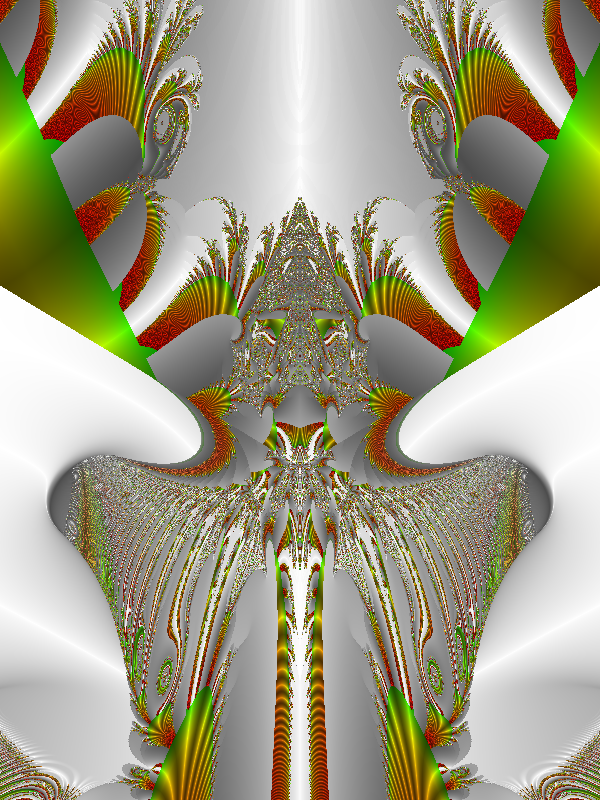

In [145]:
#                  Rotation > Hue, Escape Time > Saturation, Distance > Value (no significantly muted)
H = 1 - ncp.graphic_norm(Zd)
S = 1 - ncp.graphic_norm(ET)
V = ncp.graphic_norm(Zr)

t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max=1.0, H_min=0.0, S_max=1.0, S_min=0.0, V_max=1.0, V_min=0.3)
print('coloring time:\t',time.time() - t0)
display(I)

In [34]:
#                                        smaller -> view individual escape time sets
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = 1/3 + 0.0j
par_set['theta'] = np.pi/2
par_set['zoom'] = 1/3

par_set['it_max'] = 65
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

list_tuple = [(T_Spake_Z, ([1.92846051108342, 2.27919841968635, 3.37327534248407, 2.17984103218476]))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

12.652913808822632 	 total time


ET =	 2


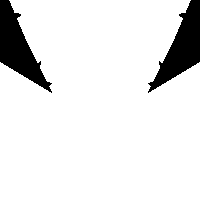

ET =	 3


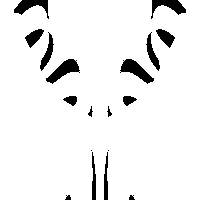

ET =	 4


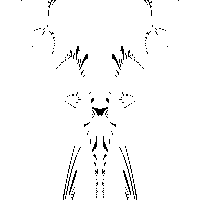

ET =	 5


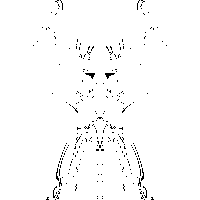

ET =	 6


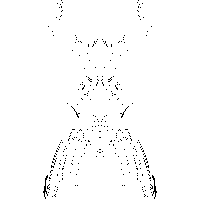

ET =	 7


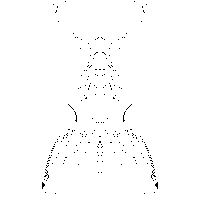

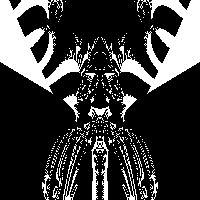

In [38]:
#                                        view smaller - individual escape time starting points
for t in range(2,8):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > 7] = 0
display(ncp.mat_to_gray(I))

In [36]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 0
2 4038
3 2658
4 960
5 740
6 566
7 368
8 256
9 216
10 146
11 142
12 126
13 94
14 76
15 80
16 78
17 60
18 64
19 60
20 42
21 46
22 52
23 44
24 24
25 32
26 34
27 28
28 32
29 10
30 30
31 18
32 24
33 16
34 10
35 16
36 14
37 20
38 10
39 6
40 8
41 4
42 12
43 14
44 14
45 8
46 8
47 6
48 2
49 12
50 10
51 4
52 6
53 8
54 8
55 0
56 6
57 4
58 4
59 6
60 6
61 2
62 0
63 0
64 0
65 4

How many never escaped:
> 28608


In [37]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  4.68 -141.6 degrees

    28608 total unescaped points

   points near V       (plane units)
    28608 within V/ 1  (4.681)
    26802 within V/ 2  (2.340)
    14501 within V/ 3  (1.560)
     8088 within V/ 4  (1.170)
     4533 within V/ 5  (0.936)
     2911 within V/ 6  (0.780)
     1914 within V/ 7  (0.669)
     1368 within V/ 8  (0.585)
     1015 within V/ 9  (0.520)
      805 within V/10  (0.468)
      693 within V/11  (0.426)
